# Problem Statement: Computer Vision for Plant Seedings Classification

### Computer vision is an interdisciplinary scientific field that deals with how computers can be made to gain high-level understanding from digital images or videos. From the perspective of engineering, it seeks to automate tasks that the human visual system can do.

# Objectives: The points distribution for this case is as follows:

1) Read the images and generate the train and test dataset (5 points)

2) Divide the data set into Train and validation data sets

3) Initialize & build the model (10 points)

4) Optimize the model (5 points)

5) Predict the accuracy for both train and validation data (5 points)

<img src="1.jpg">

## 1. Read the images and generate the train and test dataset (5 points)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import keras
from google.colab import drive

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/AIML/R7')

In [0]:
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as z:
  z.extractall()

In [0]:
from zipfile import ZipFile
with ZipFile('test.zip', 'r') as z:
  z.extractall()

## 2. Divide the data set into Train and validation data sets¶


In [0]:
project_path = '/content/drive/My Drive/AIML/R7/'


In [0]:
train_path = project_path + 'train.zip'
test_path = project_path + 'test.zip'

In [0]:
os.chdir('/content/drive/My Drive/AIML/R7/')


In [0]:
os.chdir(project_path + 'train/')


In [17]:
os.listdir()


['Fat Hen',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Black-grass',
 'Sugar beet',
 'Shepherds Purse',
 'Charlock',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Maize',
 'Common Chickweed',
 'Common wheat']

In [18]:
for i in os.listdir() :
  print(i)

Fat Hen
Small-flowered Cranesbill
Cleavers
Black-grass
Sugar beet
Shepherds Purse
Charlock
Loose Silky-bent
Scentless Mayweed
Maize
Common Chickweed
Common wheat


In [20]:
x_train = []
y_train = []
import cv2
for i in os.listdir():
    print(i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
                try:
                    dummy = cv2.imread('/content/drive/My Drive/AIML/R7/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    x_train.append(dummy)
                    y_train.append(i)
                except Exception as e:
                    print(e)

Fat Hen
Small-flowered Cranesbill
Cleavers
Black-grass
Sugar beet
Shepherds Purse
Charlock
Loose Silky-bent
Scentless Mayweed
Maize
Common Chickweed
Common wheat


## Optimize the model (5 points)¶


#### Adaptive Histogram equalization and Contrast stretching¶


### Adaptive histogram equalization (AHE) is a computer image processing technique used to improve contrast in images. It is therefore suitable for improving the local contrast and enhancing the definitions of edges in each region of an image.

In [0]:
## adaptive histogram equalization (AHE) : 

def AHE(img):
    img_adapteq = exposure.equalize_adapthist(x_train, clip_limit=0.03)
    return img_adapteq


In [0]:

# Histogram equalization
 def HE(img):
    img_eq = exposure.equalize_hist(x_train)
    return img_eq

In [0]:

# Contrast stretching
def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(x_train, in_range=(p2, p98))
    return img_rescale


### ImageAugmentation

### Image augmentation is a technique that is used to artificially expand the data-set. This is helpful when we are given a data-set with very few data samples. In case of Deep Learning, this situation is bad as the model tends to over-fit when we train it on limited number of data samples.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=0.5,  # randomly flip images
    vertical_flip=0.5, # randomly flip images
    fill_mode='nearest')
    ##preprocessing_function=contrast_stretching) 
    ##preprocessing_function=AHE)  
    
# Prepare the generator
datagen.fit(x_train)

## 3. Initialize & build the model (10 points)¶


In [25]:
x_train[0].shape


(128, 128, 3)

In [26]:
len(x_train)


4750

In [0]:
x_train = np.array(x_train)


In [0]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [29]:
y_train


array([5, 5, 5, ..., 4, 4, 4])

In [30]:
len(y_train)


4750

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=12)


In [32]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, trainY, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

3800
950


In [34]:
x_train2[0].shape


(128, 128, 3)

In [0]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)
x_val = x_val.reshape(x_val.shape[0],128,128,3)

In [36]:
print (x_train2.shape)
print (x_val.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)


In [37]:
print(y_train2.shape)
print(y_val.shape)

(3800, 12)
(950, 12)


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import adam
# import noise layer
from keras.layers import GaussianNoise

# define noise layer
##layer = GaussianNoise(0.1)

In [39]:
model = Sequential()
model.add(BatchNormalization(input_shape = (128,128,3)))
model.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))
##model.add(GaussianNoise(0.1))

model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))
##model.add(GaussianNoise(0.1))

model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))
## model.add(GaussianNoise(0.1))

model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.8))
##model.add(GaussianNoise(0.1))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
#model.add(Dropout(0.3))
##model.add(GaussianNoise(0.1))
model.add(Dense(units = 32, activation = 'relu'))
#model.add(Dropout(0.3))
##model.add(GaussianNoise(0.1))
model.add(Dense(units = 12, activation = 'softmax'))

In [0]:
## Optimizations Techniques tried while building the model and respective observations

## Added Dropout
## Added Noise
## Added Maxpooling

## Dropout and Noise did not helped us much to increase the Test Accuracy for this Dataset


## 5. Predict the accuracy for both train and validation data (5 points)¶


In [40]:

## optimizer = keras.optimizers.Adadelta(lr=0.001)
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [41]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)      

In [66]:
batch_size = 64
nb_epochs = 10
history = model.fit(x_train,trainY,
                    epochs=5, 
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Train on 4750 samples, validate on 950 samples
Epoch 1/5
4750/4750 [==============================] - 219s 46ms/step - loss: 0.1846 - acc: 0.9352 - val_loss: 0.1310 - val_acc: 0.9484
Epoch 2/5
4750/4750 [==============================] - 218s 46ms/step - loss: 0.1594 - acc: 0.9436 - val_loss: 0.2700 - val_acc: 0.9011
Epoch 3/5
4750/4750 [==============================] - 218s 46ms/step - loss: 0.1384 - acc: 0.9474 - val_loss: 0.0802 - val_acc: 0.9674
Epoch 4/5
4750/4750 [==============================] - 220s 46ms/step - loss: 0.0898 - acc: 0.9686 - val_loss: 0.0447 - val_acc: 0.9863
Epoch 5/5
4750/4750 [==============================] - 219s 46ms/step - loss: 0.0896 - acc: 0.9697 - val_loss: 0.1083 - val_acc: 0.9558


### Optimization and Regularization Observations¶


In [0]:

## Optimizations Techniques tried and respective observations

## Experimenting with contrast adjustment :  The below optimizations were tried out in Image Augmentation. But it did not helped us much to increase the Test Accuracy for this Dataset
##   Contrast stretching
##   Histogram equalization
##   Adaptive histogram equalization

## Optimizations Techniques tried while building the model and respective observations

## Added Dropout
## Added Noise
## Added Maxpooling

## Dropout and Noise did not helped us much to increase the Test Accuracy for this Dataset


## Visualize model accuracy¶¶


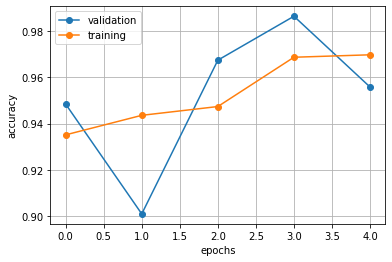

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(history.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

In [0]:
## In the above graph we can Infer that Validation accuracy looks better


### Predicting Test Dataset¶


In [0]:
os.chdir(project_path + 'test/')


In [46]:
len(os.listdir())


794

In [0]:
x_test = []
filename =[]
import cv2
for i in os.listdir():
    try:
      dummy = cv2.imread('/content/drive/My Drive/AIML/R7/test/'+ i)
      dummy = cv2.resize(dummy,(128,128))
      x_test.append(dummy)
      filename.append(i)
    except Exception as e:
      print(e)

In [51]:
len(x_test)


794

In [0]:
x_test = np.array(x_test)


In [53]:
x_test[0].shape


(128, 128, 3)

In [0]:
y_pred = (model.predict(x_test))


In [56]:
y_pred


array([[4.5799084e-15, 2.9882729e-16, 1.3691172e-17, ..., 9.5543663e-11,
        1.7434351e-10, 7.2385292e-11],
       [3.3975801e-11, 6.3683042e-06, 9.9920756e-01, ..., 6.7987118e-12,
        4.2213488e-04, 6.6717968e-07],
       [2.0859318e-03, 4.2045309e-14, 5.9791470e-11, ..., 1.8173413e-16,
        1.0801599e-12, 7.8675433e-10],
       ...,
       [3.5006448e-07, 2.7130821e-07, 3.1906384e-04, ..., 8.6458385e-07,
        4.5765369e-06, 7.4382001e-06],
       [4.0319744e-11, 8.6889131e-15, 4.1345924e-12, ..., 1.6171136e-13,
        9.9999940e-01, 1.3989227e-11],
       [1.2444418e-12, 9.9996603e-01, 1.2802273e-05, ..., 3.2368550e-09,
        5.9609555e-08, 2.1009637e-05]], dtype=float32)

In [0]:
final_predictions=[]
for x in range(len(y_pred)):
#Get predicted number with highest probability
  predicted_num = np.argmax(y_pred[x])
#Print the number
  final_predictions.append(predicted_num)

In [58]:
len(final_predictions)


794

In [0]:
## Inversing the encoded values to get the name of the Seedings


In [0]:
predictions_test = encoder.inverse_transform(final_predictions)


In [0]:
filename = np.array(filename)


In [61]:
len(filename)


794

In [0]:
dataset = pd.DataFrame({'file': filename, 'species': predictions_test}, columns=['file', 'species'])


In [63]:
dataset

,file,species
0,c0461776c.png,Common Chickweed
1,4bbfd1e05.png,Cleavers
2,1d0cbd819.png,Loose Silky-bent
3,93079d970.png,Sugar beet
4,856f2910a.png,Small-flowered Cranesbill
...,...,...
789,da231c97f.png,Shepherds Purse
790,632156793.png,Cleavers
791,953496deb.png,Fat Hen
792,e88bf0db9.png,Small-flowered Cranesbill


Overall, this was a complex task due to image resolution being quite high originally and data augmented model provided much better accuracy than the pooling and simple CNN models.

However, after a lot of optimization which includes adding BatchNormalization for Regularization, adam optimizer, appropriate Batch Size and epoch length, appropriate steps per epoch, Adding Pooling and all wrapped in Data Augmentation provided a peak accuracy of 78% on the validation set and 99.7% on the training set, which is a satisfactory performance.

I believe the accuracy can be improved maybe by further finetuning the hyperparameters (number of epochs, optimizer configuration and batch size) for the data augmentation case, though there is the computational complexity drawback inherent in data augmentation cases.

Note that I had eatlier attempted to use 32 32 size resolution, which provided awful results so I increased the size to 64 64 and then to 96*96 for the best results. Also the dataset is quite large, hence preprocessing deeply could have helped improve model accuracy further. Earlier resolution of 128 by 128 was computationally difficult with current Colab GPU Environment, and may have provided better results.



<img src  ="3.jpg">